## The Challenge
The challenge is to pick a company from [UCI's Dataset on Sentiment Analysis](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) and apply a Naive Bayes Classifier to see if a sentence is positive (1) or negative (0).  There are no neutral sentiments.  The sentences come from either amazon.com, yelp.com, or imdb.com.  I chose to work with yelp's data because who doesn't like food?


### 1 - Load the Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB


C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
yelp = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', delimiter= '\t', header = None)
yelp.columns = ['sentence', 'positive']

Looking at the first 10 rows, there are two columns:  one of the the sentence, and the other if the sentiment is positive (1) or not (0).  Sentences can be very short, as little as three words, to very long, more than 10 words.  

In [3]:
yelp.head(10)

,sentence,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


### 3 -  Feature Engineering
In this case, feature engineering encompasses finding keywords associated with either positive or negative reviews.  While thinking of keywords, I decided that negative reviews would have fewer keywords because of the word 'not' (i.e.  not good, not clean).  Also, it is rare but sometimes people write reviews/sentences in all caps as a sign of extreme emotion, whether it is positive or negative, so finding sentences in all caps is another feature.

I tried including punctuation such as exclamation and question marks, but that did not help the model differentiate between positive and negative sentiments.  

In [4]:
keywords = ['not', 'terrible', 'bad', 'didn\'t', 'hated', 'nasty', 'slow', 'disgusting', 'worst', 'never', 'wasted', 'else',
           'hair', 'dry', 'dirty', 'expensive', 'wasted', 'overpriced']

In [5]:
for key in keywords:
    yelp[str(key)] = yelp.sentence.str.contains(key, case = False)

In [6]:
yelp['allcaps'] = yelp.sentence.str.isupper()

Below is a heatmap showing correlations between the features (keywords and all caps) and sentiment.  The main thing to look for here is if any of the features are correlated with each other.  The only pair that might be of concern is dirty:not.  

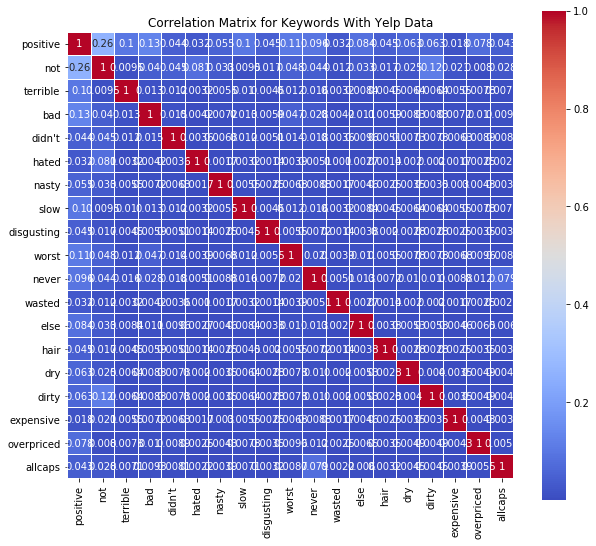

In [7]:
plt.figure(figsize=(10,9))
sns.heatmap(np.absolute(yelp.corr()), annot = True, square = True, linewidths=0.01, cmap = 'coolwarm')
plt.title('Correlation Matrix for Keywords With Yelp Data')

### 4 - The Model
Lastly, applying the dataset to the model.  First step is to identify the training (X) and target (Y) variables.  Since there are only two outcomes (positive and negative), this is a binomial outcome, so it is appropriate to use sklearn's BernoulliNB algorithm.  The result is that there is an error rate of 32.5%.  

In [8]:
X = yelp[keywords + ['allcaps']]
Y = yelp['positive']

In [9]:
bern = BernoulliNB()
bern.fit(X, Y)
y_pred = bern.predict(X)
print('Number of mislabeled sentences: {} out of {}'.format((Y != y_pred).sum(), yelp.shape[0]))

Number of mislabeled sentences: 325 out of 1000


### 5 - Applying to Another Dataset
How robust are these keywords for sentiment analysis?  One way to test this out is to apply it to a different dataset.  From the data provided from UCI, there are two other datasets to choose from: imdb.com and amazon.com.  I've choosen amazon because I've used their service more.  

In [10]:
amazon = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', delimiter= '\t', header = None)
amazon.columns = ['sentence', 'positive']

In [11]:
for key in keywords:
    amazon[str(key)] = amazon.sentence.str.contains(key, case = False)

In [12]:
amazon['allcaps'] = amazon.sentence.str.isupper()

Below is a correlation matrix with the same features as the yelp data.  As you can see, there are a few blank rows and columns, meaning those keywords didn't show up in the amazon reveiws.  Already there are signs that the keywords aren't robust.

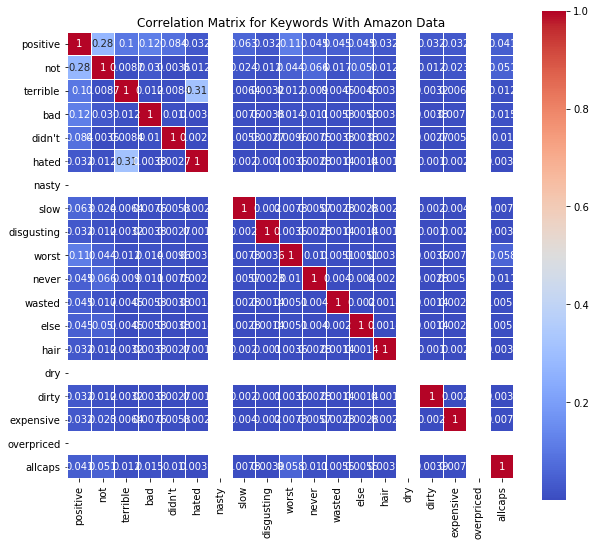

In [13]:
plt.figure(figsize=(10,9))
sns.heatmap(np.absolute(amazon.corr()), annot = True, square = True, linewidths=0.01, cmap = 'coolwarm')
plt.title('Correlation Matrix for Keywords With Amazon Data')

In [14]:
X = amazon[keywords + ['allcaps']]
Y = amazon['positive']

In [15]:
bern = BernoulliNB()
bern.fit(X, Y)
y_pred = bern.predict(X)
print('Number of mislabeled sentences: {} out of {}'.format((Y != y_pred).sum(), yelp.shape[0]))

Number of mislabeled sentences: 358 out of 1000


The model did slightly worse for the amazon dataset, with an error rate of 35.8%.